# 介绍
- [Seaborn 官网](https://seaborn.pydata.org/tutorial/introduction.html)
- [Seaborn Galllery](https://seaborn.pydata.org/examples/index.html)

Seaborn 是基于Python且非常受欢迎的图形可视化库，在Matplotlib的基础上进行了更高级的封装，使得作图更加方便快捷。

# 数据准备
我们可以使用seaborn 的load_dataset用户加载自带的数据集，例如： titannic、tips

seaborn默认在~/seaborn-data目录找数据，自动下载会很慢，可以clone网站https://github.com/mwaskom/seaborn-data到home目录

我们使用tips数据集来演示seaborn的使用，这个数据集记录了一个餐厅的服务员收到的小费金额、顾客人数、性别、是否吸烟、日期和时间等信息。具体来说，该数据集包含以下变量：

- total_bill: 总账单金额，单位为美元。
- tip: 小费金额，单位为美元。
- sex: 顾客性别，取值为"Male"或"Female"。
- smoker: 是否吸烟，取值为"Yes"或"No"。
- day: 用餐日期，取值为"Thur"、"Fri"、"Sat"或"Sun"。
- time: 用餐时间，取值为"Lunch"或"Dinner"。
- size: 用餐人数。

该数据集共有244个样本，数据比较干净，没有缺失值。通过使用该数据集，可以进行以下分析和可视化：

- 描述性统计分析：统计不同变量的均值、中位数、标准差等指标，帮助了解数据的分布情况。
- 可视化分析：使用seaborn的绘图函数，例如散点图、柱状图、箱线图等，来可视化不同变量之间的关系和分布情况。
- 数据探索：通过对数据进行探索性分析，例如不同时间和日期的用餐情况、小费金额和账单金额之间的关系、吸烟者和非吸烟者的消费习惯等，来帮助了解该餐厅的经营情况和顾客的消费行为。

In [1]:
import seaborn as sns

In [2]:
# 
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 趋势图

## lineplot（折线图）

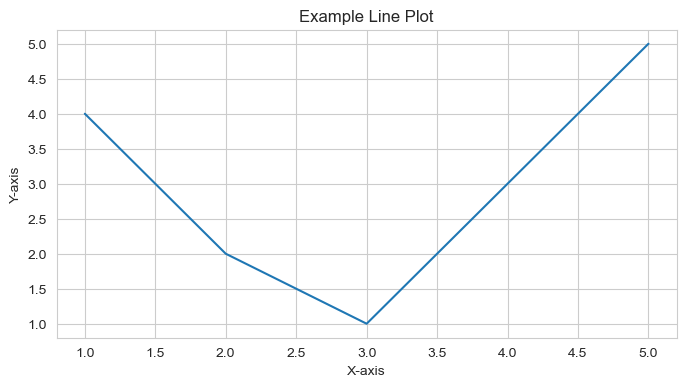

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建数据
x = [1, 2, 3, 4, 5]
y = [4, 2, 1, 3, 5]

# 创建画布
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 4))

# 绘制折线图
sns.lineplot(x=x, y=y, ax=ax)

# 设置标题和标签
ax.set_title("Example Line Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# 显示图形
plt.show()

In [3]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

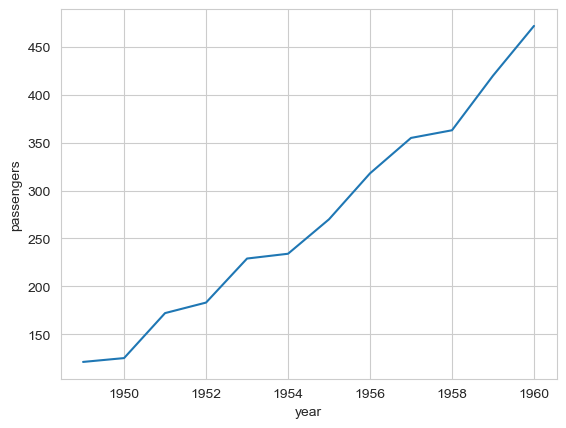

In [4]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x="year", y="passengers")

使用hue展示多系列

<AxesSubplot:xlabel='year', ylabel='passengers'>

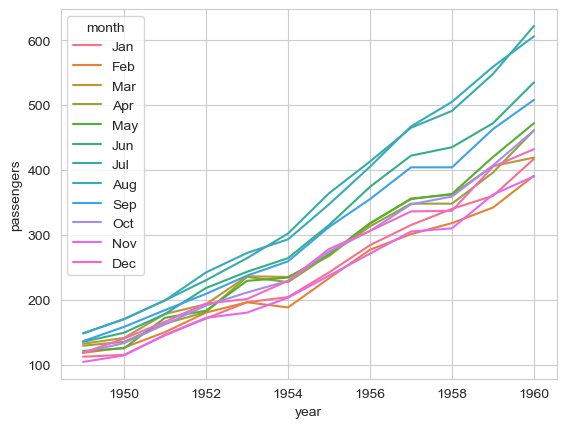

In [5]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month")

In [6]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


In [7]:
flights_wide.dtypes

month
Jan    int64
Feb    int64
Mar    int64
Apr    int64
May    int64
Jun    int64
Jul    int64
Aug    int64
Sep    int64
Oct    int64
Nov    int64
Dec    int64
dtype: object

# Relationship 关系图

## barplot (柱状图)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

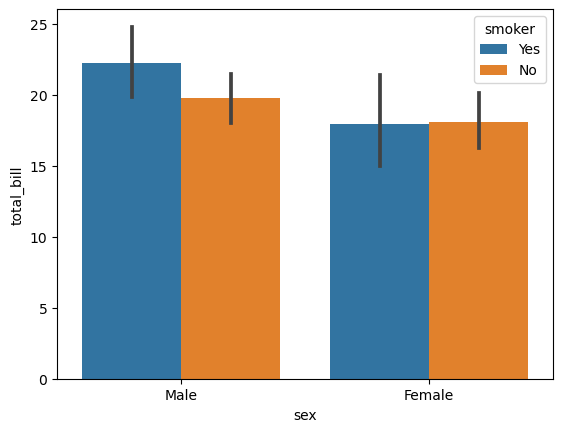

In [3]:
sns.barplot(data=tips, x='sex', y='total_bill', hue='smoker')

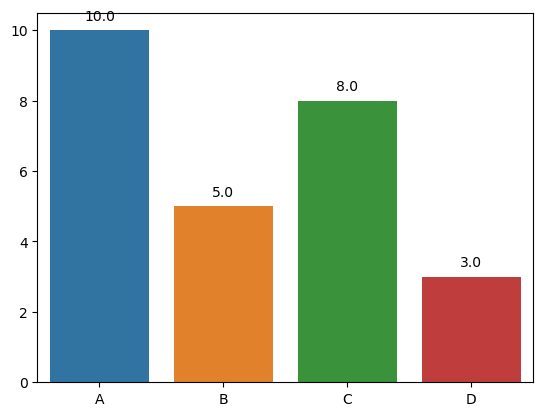

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建示例数据
data = {'Category': ['A', 'B', 'C', 'D'],
        'Value': [10, 5, 8, 3]}

# 创建 barplot
ax = sns.barplot(x='Category', y='Value', data=data)

# 自动显示标签
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

# 显示图形
plt.show()

## 分类图 - catplot

In [13]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


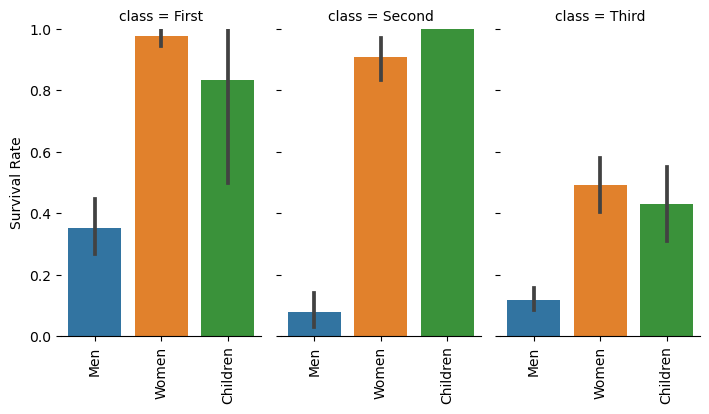

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
g = sns.catplot(
    data=df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"], rotation=90)
# g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

# boxplot（箱线图）
seaborn包提供了boxplot（箱线图）图表类型，它是一种用于可视化数据分布和异常值的常用方法。boxplot图通常用于以下几种情况：

数据分布的可视化：boxplot可以将数据分布的中位数、四分位数、最小值、最大值等统计量可视化，帮助我们快速了解数据的分布情况。

检测异常值：boxplot能够直观地显示出异常值，帮助我们快速检测和识别数据中的异常值。

比较不同群体的数据分布：通过将多个箱线图放在一起进行比较，我们可以直观地了解不同群体之间的数据分布情况，进一步了解群体之间的异同。

在seaborn中，使用boxplot()函数绘制箱线图。可以通过传递数据数组和其他参数来定制图表，例如设置x轴和y轴标签、设置箱体和须的颜色、设置是否显示异常值等。绘制的箱线图主要包括箱体、须和异常值，其中箱体代表数据的四分位数，须代表数据的最大值和最小值，异常值是超出数据范围的点。


<AxesSubplot:xlabel='day', ylabel='total_bill'>

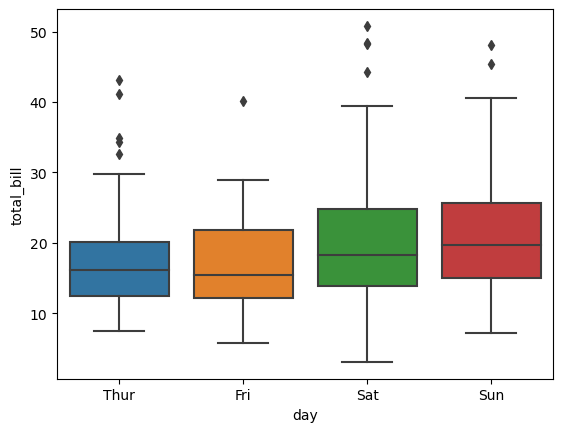

In [25]:
sns.boxplot(data = tips, x='day', y='total_bill')

In [26]:

tips_nums.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


# kdeplot（核密度估计曲线）
seaborn中的kdeplot函数可以绘制单变量或双变量的核密度估计曲线（KDE）。KDE是一种常用的非参数估计方法，用于估计一个变量的概率密度函数。KDE通过将每个数据点周围的小尺度高斯函数叠加在一起来估计概率密度函数，进而绘制出平滑的概率密度曲线。

kdeplot函数的作用包括：

1. 可视化单变量分布的形态：通过绘制单变量的KDE曲线，可以直观地了解单个变量的分布情况，例如是否呈现单峰、双峰、对称、偏态等特征。
2. 可视化双变量分布的形态：通过绘制双变量的KDE曲面，可以直观地了解两个变量之间的关系，例如是否存在正相关、负相关、线性关系、非线性关系等特征。
3. 可视化不同类别的分布：通过使用hue参数，可以在同一图表中绘制不同类别下的KDE曲线或曲面，从而直观地比较不同类别之间的分布情况。
4. 可以与其他绘图函数组合使用：kdeplot函数可以与其他seaborn绘图函数组合使用，例如使用rugplot函数在KDE曲线上添加数据点的位置，使用violinplot函数绘制KDE和箱线图结合的小提琴图等。

总之，kdeplot函数是一种非常有用的数据可视化技术，可以方便地展示数据分布情况和变量之间的关系，对于数据分析和探索性数据分析非常有帮助。


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

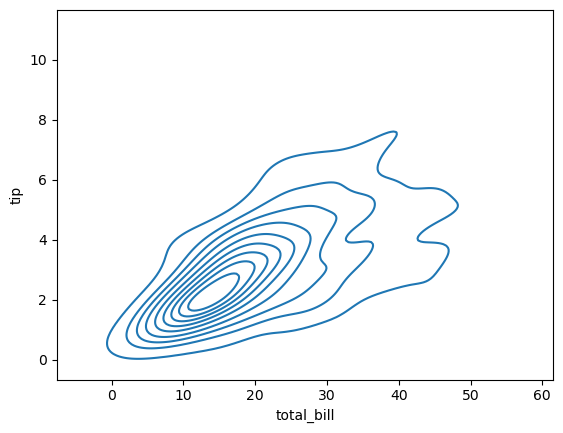

In [30]:
sns.kdeplot(data=tips, x='total_bill', y='tip')

<AxesSubplot:xlabel='tip', ylabel='Density'>

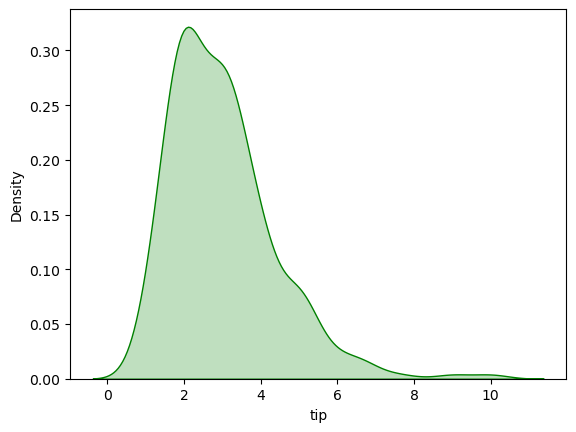

In [32]:
sns.kdeplot(tips.tip, fill=True, color='g')

# histplot(矩形图)
统计每个值的数量

> 使用sns绘制的图不用写xlabel，ylable

<AxesSubplot:>

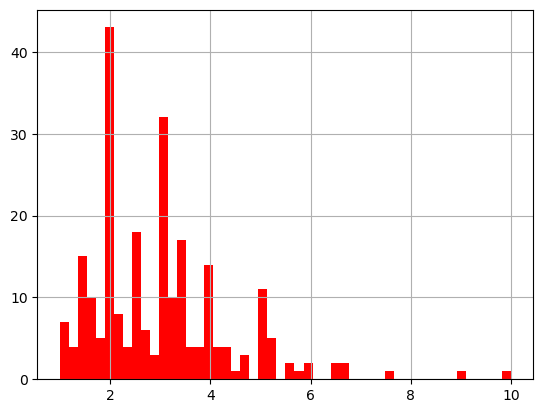

In [35]:

tips.tip.hist(bins=50, color='red')

<AxesSubplot:xlabel='tip', ylabel='Count'>

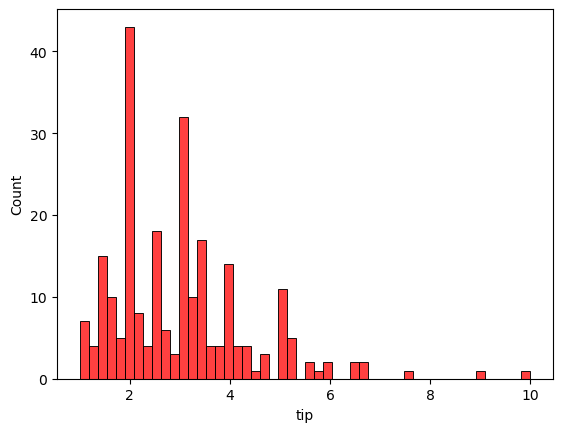

In [37]:
sns.histplot(tips.tip, bins=50, color='red')

# Shapiro-Wilk 测试数据是否符合正态分布

In [39]:
import scipy.stats as stats

stat, p = stats.shapiro(tips.tip)

# 根据 p 值进行假设检验：

alpha = 0.05  # 设置显著性水平
if p > alpha:
    print('样本符合正态分布假设')
else:
    print('样本不符合正态分布假设')


样本不符合正态分布假设


In [46]:
import numpy as np

# 设置随机种子，以便结果可重复
np.random.seed(123)

# 生成符合正态分布的随机数
mu, sigma = 10, 2  # 正态分布的均值和标准差
size = 100  # 生成的样本数量
samples = np.random.normal(mu, sigma, size)

# 打印前10个随机数
print(samples)

stat, p = stats.shapiro(samples)

# 根据 p 值进行假设检验：
alpha = 0.05  # 设置显著性水平
if p > alpha:
    print('样本符合正态分布假设')
else:
    print('样本不符合正态分布假设')


[ 7.82873879 11.99469089 10.565957    6.98741057  8.8427995  13.30287307
  5.14664151  9.14217474 12.53187252  8.2665192   8.6422277   9.81058206
 12.98277925  8.72219601  9.11203608  9.13129745 14.41186017 14.37357218
 12.0081078  10.7723728  11.47473715 12.98146406  8.12833226 12.35165809
  7.49223866  8.724497   11.81421039  7.1426386   9.71986256  8.27649021
  9.48876126  4.40282179  6.45693379  8.60024553 11.85492486  9.65272863
 10.00569183 11.37644542  8.24092731 10.56725465  8.38926696  6.54466101
  9.21820041 11.14761172 10.6771781   9.97633901 14.78473053 10.82582432
 11.95747201 14.47628668  7.41182935  7.92242358 13.48742445  8.40387453
 10.05936646 12.13863194 11.78141278 13.50977236 12.99128827 12.13878534
  8.45458257 11.58972534 10.62854399  7.34746908 12.83459809 11.61447307
 10.09098016  9.53381588  7.60339771 10.39904815 10.93687824  8.33769003
 12.3244081   7.80559391  5.7537993  12.07945418  9.19326792  9.74794083
  8.32496655  6.78807448 12.51047475  8.62226203 13